In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [6]:
df = pd.read_csv(r'https://raw.githubusercontent.com/EmersonChipana/Datos/main/Churn%20Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1)

In [4]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0


In [5]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=116)

In [8]:
modelo = DecisionTreeClassifier(criterion='entropy',max_depth=4)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
y_pred = modelo.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [10]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

[Text(0.5446428571428571, 0.9, 'Age <= 42.5\nentropy = 0.734\nsamples = 6500\nvalue = [5161, 1339]\nclass = 0'),
 Text(0.2857142857142857, 0.7, 'NumOfProducts <= 2.5\nentropy = 0.527\nsamples = 4623\nvalue = [4072, 551]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'NumOfProducts <= 1.5\nentropy = 0.484\nsamples = 4516\nvalue = [4043, 473]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'Age <= 38.5\nentropy = 0.64\nsamples = 2215\nvalue = [1855, 360]\nclass = 0'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.567\nsamples = 1700\nvalue = [1473, 227]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.824\nsamples = 515\nvalue = [382, 133]\nclass = 0'),
 Text(0.21428571428571427, 0.3, 'Balance <= 1884.345\nentropy = 0.283\nsamples = 2301\nvalue = [2188, 113]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.157\nsamples = 1316\nvalue = [1286, 30]\nclass = 0'),
 Text(0.25, 0.1, 'entropy = 0.417\nsamples = 985\nvalue = [902, 83]\nclass = 0'),
 Text(0.42857142857142855, 0.5, 

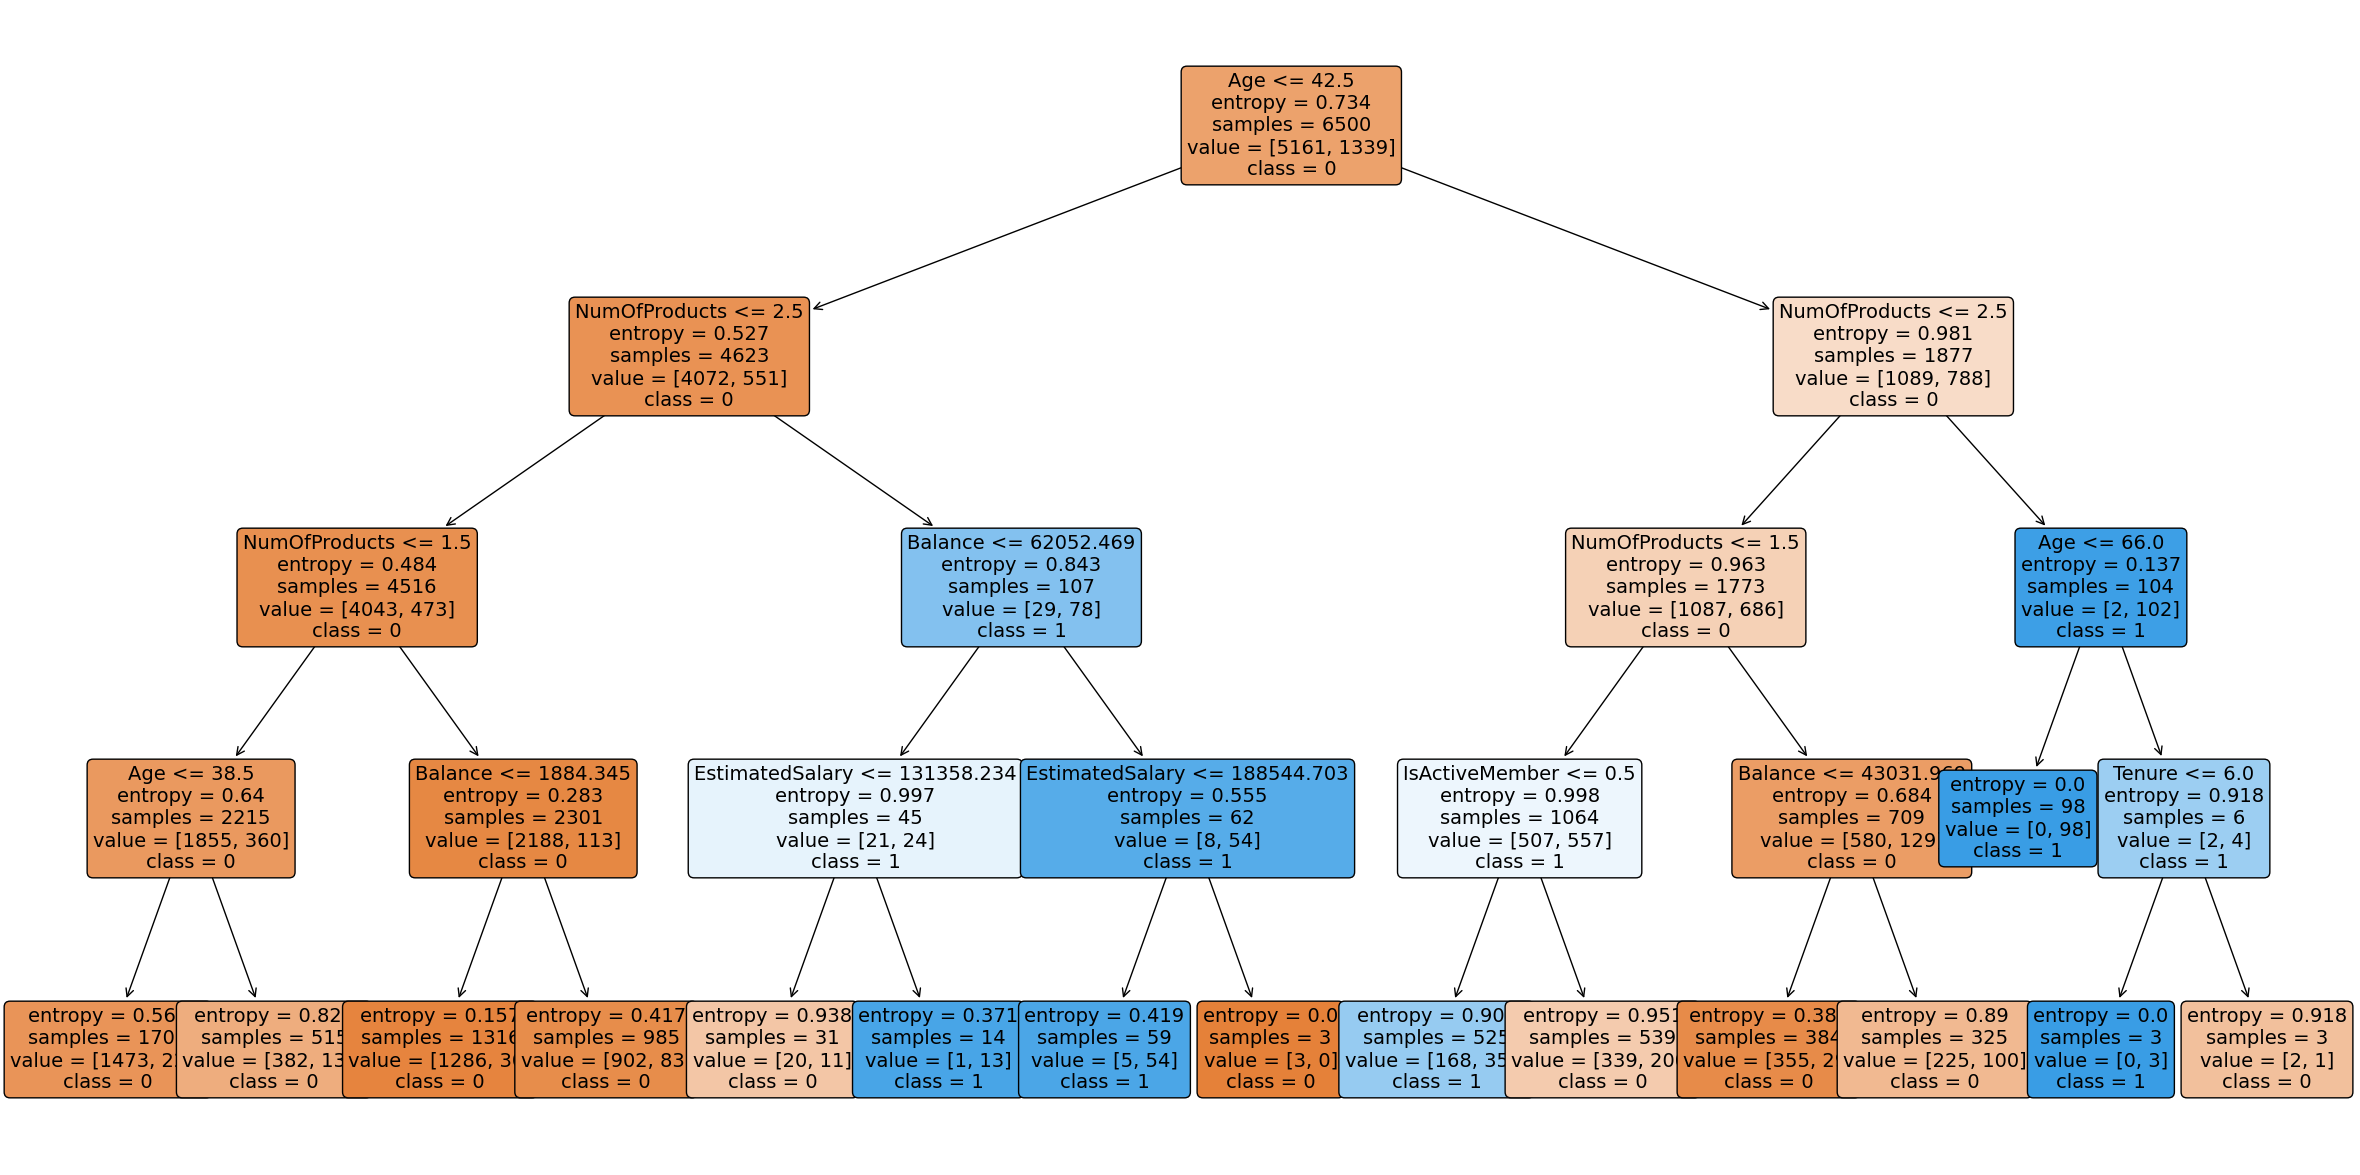

In [13]:
plt.figure(figsize=(30,15))
plot_tree(decision_tree=modelo, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True, fontsize=14)

In [14]:
text_modelo = export_text(decision_tree=modelo, feature_names=X.columns.tolist())
print(text_modelo)

|--- Age <= 42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- Age <= 38.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  38.50
|   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- Balance <= 1884.34
|   |   |   |   |--- class: 0
|   |   |   |--- Balance >  1884.34
|   |   |   |   |--- class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- Balance <= 62052.47
|   |   |   |--- EstimatedSalary <= 131358.23
|   |   |   |   |--- class: 0
|   |   |   |--- EstimatedSalary >  131358.23
|   |   |   |   |--- class: 1
|   |   |--- Balance >  62052.47
|   |   |   |--- EstimatedSalary <= 188544.70
|   |   |   |   |--- class: 1
|   |   |   |--- EstimatedSalary >  188544.70
|   |   |   |   |--- class: 0
|--- Age >  42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- IsActiveMember >  0.50
|   |   |   |   |--- class: 0
|   

In [15]:
accuracy_score(y_test, y_pred)

0.8625714285714285

In [16]:
# Run a python(flask)-based web service in your note book
# You can reload this cell to restart the server if you make changes

default_port = 5001

from werkzeug.serving import make_server
from flask import Flask
from flask import render_template, request
import threading

class ServerThread(threading.Thread):

    def __init__(self, app, port):
        threading.Thread.__init__(self)
        self.port = port
        self.srv = make_server('127.0.0.1', port, app)
        self.ctx = app.app_context()
        self.ctx.push()

    def run(self):
        print('starting server on port:',self.port)
        self.srv.serve_forever()

    def shutdown(self):
        self.srv.shutdown()

def start_server(port=default_port):
    global server
    if 'server' in globals() and server:
      print('stopping server')
      stop_server()

    app = Flask('myapp')
    
    @app.route("/", methods=['GET', 'POST'])
    def hello():
      if(request.method == 'POST'):
        print(request.form)
        age = request.form['edad']
        tenure = request.form['tenure']
        balance = request.form['balance']
        numProd = request.form['numProd']
        cardCr = request.form['cardCr']
        member = request.form['member']
        salario = request.form['salario']
        sex = request.form['sex']
        credScore = request.form['credScore']
        newPred = modelo.predict([[float(credScore),int(age),int(tenure),float(balance),int(numProd),int(cardCr),int(member),int(salario),int(sex)]])
        print(newPred)
        return render_template('index.html', pred=int(newPred))
      else:
        return render_template('index.html')

    server = ServerThread(app,port)
    server.start()

def stop_server():
    global server
    if server:
      server.shutdown()
      server = None

# Start the server here


In [17]:
start_server()

starting server on port: 5001


127.0.0.1 - - [08/Nov/2022 16:34:44] "GET / HTTP/1.1" 200 -
c:\Users\emers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [08/Nov/2022 16:37:30] "POST / HTTP/1.1" 200 -


ImmutableMultiDict([('credScore', '1245'), ('edad', '65'), ('tenure', '10'), ('balance', '2110'), ('numProd', '1'), ('cardCr', '0'), ('member', '1'), ('salario', '574'), ('sex', '1')])
[0]


c:\Users\emers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [08/Nov/2022 16:38:06] "POST / HTTP/1.1" 200 -


ImmutableMultiDict([('credScore', '1245'), ('edad', '65'), ('tenure', '10'), ('balance', '2110'), ('numProd', '1'), ('cardCr', '0'), ('member', '1'), ('salario', '574'), ('sex', '1')])
[0]


c:\Users\emers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [08/Nov/2022 16:39:21] "POST / HTTP/1.1" 200 -


ImmutableMultiDict([('credScore', '1245'), ('edad', '65'), ('tenure', '10'), ('balance', '2110'), ('numProd', '1'), ('cardCr', '0'), ('member', '1'), ('salario', '574'), ('sex', '1')])
[0]


c:\Users\emers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [08/Nov/2022 16:40:15] "POST / HTTP/1.1" 200 -


ImmutableMultiDict([('credScore', '1200'), ('edad', '55'), ('tenure', '2'), ('balance', '1200'), ('numProd', '3'), ('cardCr', '0'), ('member', '0'), ('salario', '1000'), ('sex', '1')])
[1]


127.0.0.1 - - [08/Nov/2022 16:49:32] "GET / HTTP/1.1" 200 -


In [19]:
stop_server()